In [ ]:
# Клонируем репозиторий
!git clone https://github.com/NinaShur/nn_project.git

Cloning into 'nn_project'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 8 (delta 0), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), done.


In [ ]:
# Переходим в папку репозитория
%cd nn_project
# Смотрим что внутри
!ls -la

/content/nn_project
total 32
drwxr-xr-x 7 root root 4096 Oct 24 07:11 .
drwxr-xr-x 1 root root 4096 Oct 24 07:11 ..
drwxr-xr-x 8 root root 4096 Oct 24 07:11 .git
drwxr-xr-x 2 root root 4096 Oct 24 07:11 images
drwxr-xr-x 2 root root 4096 Oct 24 07:11 models
drwxr-xr-x 2 root root 4096 Oct 24 07:11 notebooks
drwxr-xr-x 2 root root 4096 Oct 24 07:11 pages
-rw-r--r-- 1 root root   12 Oct 24 07:11 README.md


In [ ]:

# 3. Проверяем что все ок
!ls -la
!git status

total 32
drwxr-xr-x 7 root root 4096 Oct 24 07:11 .
drwxr-xr-x 1 root root 4096 Oct 24 07:11 ..
drwxr-xr-x 8 root root 4096 Oct 24 07:11 .git
drwxr-xr-x 2 root root 4096 Oct 24 07:11 images
drwxr-xr-x 2 root root 4096 Oct 24 07:11 models
drwxr-xr-x 2 root root 4096 Oct 24 07:11 notebooks
drwxr-xr-x 2 root root 4096 Oct 24 07:11 pages
-rw-r--r-- 1 root root   12 Oct 24 07:11 README.md
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [ ]:
!git config --global user.email "vasyaayba@mail.ru"
!git config --global user.name "NinaShur"

In [ ]:
%cd /content/nn_project

[Errno 2] No such file or directory: '/content/nn_project'
/content


In [ ]:
# 2. Создаем ветку
!git checkout -b nina-feature


Switched to a new branch 'nina-feature'


In [ ]:

# 3. Создаем тестовый файл для коммита
with open('my_test_file.txt', 'w') as f:
    f.write('Это моя ветка nina-feature!')



In [ ]:
# 4. Коммитим
!git add .
!git commit -m "Initial commit in nina-feature"


[nina-feature 9339fba] Initial commit in nina-feature
 1 file changed, 1 insertion(+)
 create mode 100644 my_test_file.txt


In [ ]:
# 5. Пушим
!git push origin nina-feature

print("✅ Ветка теперь должна быть на GitHub!")

fatal: could not read Username for 'https://github.com': No such device or address
✅ Ветка теперь должна быть на GitHub!


In [ ]:
# Проверим текущую папку
import os
print(f"📂 Текущая папка: {os.getcwd()}")

# Проверим git статус
!git status

# Проверим ветки
!git branch -a

📂 Текущая папка: /content/nn_project
On branch nina-feature
nothing to commit, working tree clean
  main
* nina-feature
  remotes/origin/HEAD -> origin/main
  remotes/origin/main


In [ ]:
# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Копируем репозиторий в Drive
!cp -r /content/nn_project /content/drive/MyDrive/

In [ ]:
!git add .
!git commit -m "Добавила"

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.datasets import CIFAR10
from torchvision import transforms as T
from torchvision.datasets import MNIST
import numpy as np
import torchutils as tu
import matplotlib.pyplot as plt
import mplcyberpunk
torch.manual_seed(42)
plt.style.use('cyberpunk')
from torch.nn import functional as F

from torchvision import models

In [ ]:
# !pip install mplcyberpunk
# !pip install git+https://github.com/anjandeepsahni/torchutils.git
# !pip install mlflow

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from google.colab import drive
import zipfile

# 1. Монтируем Google Drive
drive.mount('/content/drive')

# 2. Распаковываем по имени
try:
    with zipfile.ZipFile('/content/drive/MyDrive/nn_project/notebooks/Intel Image Classification.zip', 'r') as zip_ref:
        zip_ref.extractall('.')
    print("✅ Архив распакован!")
except:
    print("❌ Не удалось распаковать файл")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Архив распакован!


In [ ]:
# from google.colab import files
# uploaded = files.upload()

Saving Intel Image Classification.zip to Intel Image Classification.zip


In [ ]:
# !unzip "Intel Image Classification.zip"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train

Классы в датасете: ['mountain', 'glacier', 'forest', 'sea', 'buildings', 'street']
Количество классов: 6
Распределение по классам:
mountain: 2512 изображений
glacier: 2404 изображений
forest: 2271 изображений
sea: 2274 изображений
buildings: 2191 изображений
street: 2382 изображений


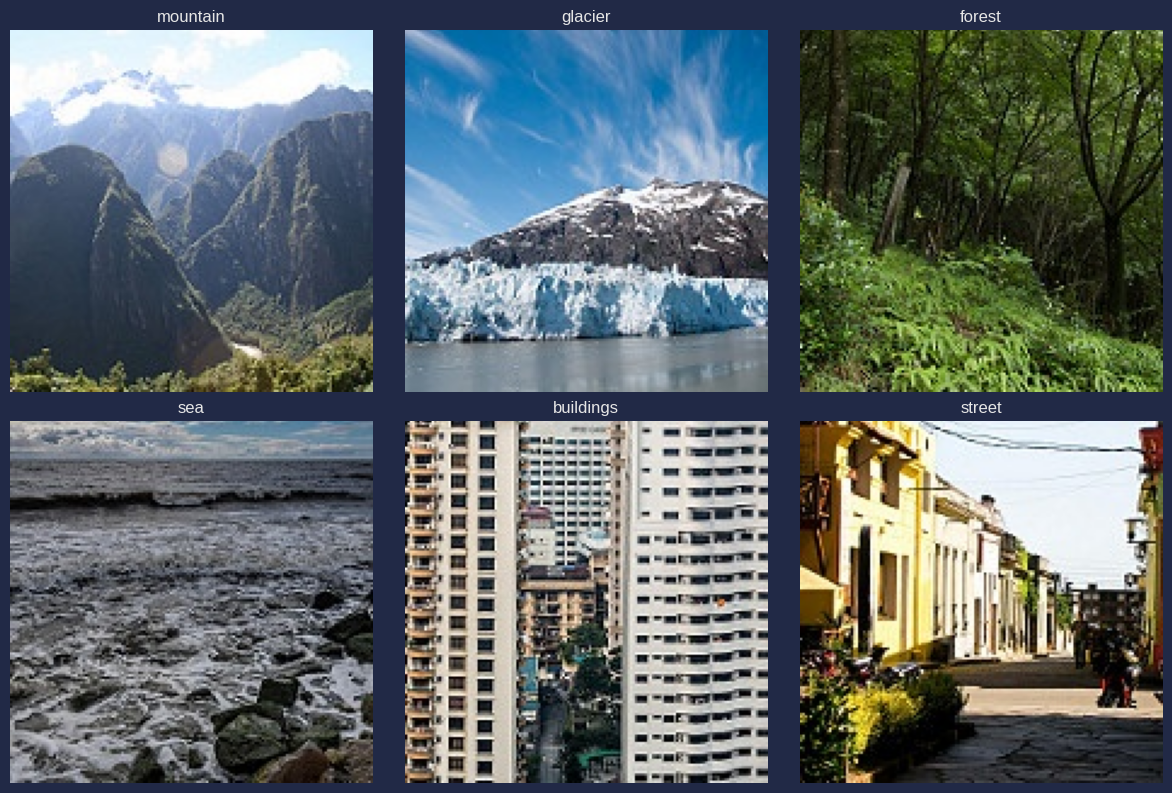

In [ ]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Путь к распакованным данным
data_path = "seg_train/seg_train"

# Смотрим какие классы есть
classes = os.listdir(data_path)
print("Классы в датасете:", classes)
print("Количество классов:", len(classes))

# Считаем количество изображений в каждом классе
class_counts = {}
for class_name in classes:
    class_path = os.path.join(data_path, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

print("Распределение по классам:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} изображений")

# Визуализируем примеры
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, class_name in enumerate(classes):
    if i >= 6:  # максимум 6 классов
        break
    class_path = os.path.join(data_path, class_name)
    images = os.listdir(class_path)
    if images:
        img_path = os.path.join(class_path, images[0])
        img = plt.imread(img_path)
        axes[i//3, i%3].imshow(img)
        axes[i//3, i%3].set_title(class_name)
        axes[i//3, i%3].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# уагментации для тренировочных данных
train_transforms = T.Compose([
    T.Resize((224, 224)),
    T.RandomHorizontalFlip(p=0.5),      # Случайное отражение
    T.RandomRotation(degrees=15),       # Случайный поворот
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Изменение цветов
    T.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Случайное смещение
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# базовые трансформации для валидации (без аугментаций)
valid_transforms = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(root='seg_train/seg_train', transform=train_transforms)
valid_dataset = datasets.ImageFolder(root='seg_test/seg_test', transform=valid_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)  # Добавим для ускорения загрузки)
valid_loader = DataLoader(valid_dataset, batch_size=16, shuffle=False, num_workers=2)

# количество классов в датасете
num_classes = len(train_dataset.classes)
print(f"Количество классов: {num_classes}")
print(f"Классы: {train_dataset.classes}")

print(f"\n✅ DATALOADER'Ы ПЕРЕСОЗДАНЫ:")
print(f"   Train: {len(train_loader)} батчей")
print(f"   Valid: {len(valid_loader)} батчей")


# загружаем предобученную модель
model = models.resnet50(pretrained=True)

# замораживаем веса (кроме последнего слоя)
for param in model.parameters():
    param.requires_grad = False

# заменяем последний слой под нашу задачу
# ResNet50 по умолчанию имеет 1000 выходов (ImageNet)
# Для Intel Image Classification - 6 классов
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# Оптимизатор только для последнего слоя
optimizer = torch.optim.Adam(model.fc.parameters(), lr=0.001)

# используем CrossEntropy
criterion = torch.nn.CrossEntropyLoss()

Количество классов: 6
Классы: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

✅ DATALOADER'Ы ПЕРЕСОЗДАНЫ:
   Train: 878 батчей
   Valid: 188 батчей


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 181MB/s]


In [ ]:
# обучение модели
def train_model(model, train_loader, valid_loader, criterion, optimizer, device, epochs=5):

    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # обучение
        model.train()  # режим обучения
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            # перенос данных на устройство
            images, labels = images.to(device), labels.to(device)

            # обнуляем градиенты
            optimizer.zero_grad()

            # прямой проход
            outputs = model(images)
            loss = criterion(outputs, labels)

            # обратный проход
            loss.backward()
            optimizer.step()

            # считаем статистику
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # средние значения за эпоху
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        # валидация
        model.eval()  # режим оценки
        val_correct = 0
        val_total = 0
        val_running_loss = 0.0

        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        val_loss = val_running_loss / len(valid_loader)
        val_acc = 100 * val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        # вывод
        print(f'Эпоха [{epoch+1}/{epochs}] | Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f} | Train Acc: {epoch_acc:.2f}% | Val Acc: {val_acc:.2f}%')

    return train_losses, train_accuracies, val_losses, val_accuracies


train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model,
    train_loader,
    valid_loader,
    criterion,
    optimizer,
    device,
    epochs=5
)



🎯 НАЧИНАЕМ ОБУЧЕНИЕ RESNET50 С РАЗМОРОЖЕННЫМ ПОСЛЕДНИМ СЛОЕМ
Эпоха [1/5] | Train Loss: 0.3730 | Val Loss: 0.3152 | Train Acc: 86.47% | Val Acc: 89.07%
Эпоха [2/5] | Train Loss: 0.3720 | Val Loss: 0.2588 | Train Acc: 86.60% | Val Acc: 91.27%
Эпоха [3/5] | Train Loss: 0.3713 | Val Loss: 0.2512 | Train Acc: 86.70% | Val Acc: 91.07%
Эпоха [4/5] | Train Loss: 0.3727 | Val Loss: 0.2736 | Train Acc: 86.55% | Val Acc: 90.43%
Эпоха [5/5] | Train Loss: 0.3674 | Val Loss: 0.2830 | Train Acc: 86.87% | Val Acc: 89.37%


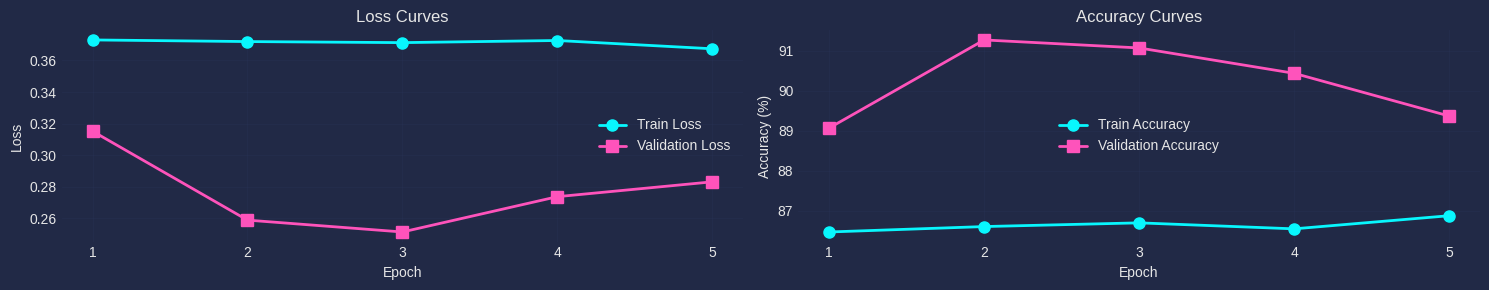

In [ ]:
plt.figure(figsize=(15, 3))
# график Loss
plt.subplot(1, 2, 1)
epochs_range = range(1, len(train_losses) + 1)
plt.plot(epochs_range, train_losses, 'o-', label='Train Loss', linewidth=2, markersize=8)
plt.plot(epochs_range, val_losses, 's-', label='Validation Loss', linewidth=2, markersize=8)
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(epochs_range)
# график Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, 'o-', label='Train Accuracy', linewidth=2, markersize=8)
plt.plot(epochs_range, val_accuracies, 's-', label='Validation Accuracy', linewidth=2, markersize=8)
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(epochs_range)

plt.tight_layout()
plt.show()

In [ ]:
# сохранение модели в папку models
import torch
from datetime import datetime
import os

checkpoint = {
    'model_state_dict': model.state_dict(),
    'class_names': train_dataset.classes,
    'num_classes': num_classes,
    'val_accuracy': val_accuracies[-1],
    'train_accuracy': train_accuracies[-1],
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
    'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}
# создаем папку models если её нет
os.makedirs('models', exist_ok=True)

model_path = '/content/drive/MyDrive/nn_project/models/intel_image_classifier_resnet50.pth'
torch.save(checkpoint, model_path)

💾 Модель сохранена: /content/drive/MyDrive/nn_project/models/intel_image_classifier_resnet50.pth
📁 Полный путь: /content/drive/MyDrive/nn_project/models/intel_image_classifier_resnet50.pth
✅ Размер: 90.0 MB
✅ Файл модели успешно создан в папке models!
📂 Содержимое папки models:


In [ ]:
# !pip install streamlit

In [ ]:
%%writefile /content/drive/MyDrive/nn_project/app.py
import streamlit as st
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import requests
from io import BytesIO
import plotly.graph_objects as go
import plotly.express as px
import os

# настройки страницы
st.set_page_config(
    page_title="Intel Image Classification",
    page_icon="🌄",
    layout="wide"
)

# классы модели
CLASS_NAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# путь к модели
MODEL_PATH = '/content/drive/MyDrive/nn_project/models/intel_image_classifier_resnet50.pth'

# загрузка модели
@st.cache_resource
def load_model():
    """Загружает обученную модель"""
    try:
        model = models.resnet50(pretrained=False)
        model.fc = nn.Linear(model.fc.in_features, 6)

        # загружаем веса модели по правильному пути
        checkpoint = torch.load(MODEL_PATH, map_location='cpu')
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()
        return model, checkpoint
    except Exception as e:
        st.error(f"Ошибка загрузки модели: {e}")
        st.info(f"Проверьте путь: {MODEL_PATH}")
        return None, None

# трансформации
def get_transforms():
    return T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# функция предсказания
def predict_image(model, image, transforms):
    """Предсказывает класс для изображения с измерением времени"""
    start_time = time.time()

    image_tensor = transforms(image).unsqueeze(0)
    with torch.no_grad():
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        predicted_class = torch.argmax(outputs[0]).item()
        confidence = probabilities[predicted_class].item()

    inference_time = time.time() - start_time
    return predicted_class, confidence, probabilities, inference_time

# загрузка изображения по URL
def load_image_from_url(url):
    try:
        response = requests.get(url, timeout=10)
        image = Image.open(BytesIO(response.content))
        return image
    except Exception as e:
        st.error(f"Ошибка загрузки изображения: {e}")
        return None

# главная страница
def show_main_page():
    st.title("Intel Image Classification")
    st.markdown("---")

    # загружаем модель и данные
    model, checkpoint = load_model()

    if model is None:
        st.error("Модель не загружена. Убедитесь, что файл модели существует.")
        return

    # информация о процессе обучения
    st.header("Процесс обучения модели")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("🧠 Архитектура модели")
        st.info("""
        - **Базовая модель:** ResNet50 (предобученная на ImageNet)
        - **Transfer Learning:** Заморожены все слои кроме последнего
        - **Классификатор:** Полносвязный слой с 6 выходами
        - **Входной размер:** 224×224×3
        - **Выходные классы:** 6
        """)

    with col2:
        st.subheader("Параметры обучения")
        st.info("""
        - **Эпохи:** 5
        - **Оптимизатор:** Adam (lr=0.001)
        - **Функция потерь:** CrossEntropyLoss
        - **Batch Size:** 32
        - **Время обучения:** ~10 минут на GPU
        - **Метрика:** Accuracy
        """)

    st.markdown("---")

    # графики обучения
    st.subheader("Графики обучения")

    # данные из чекпоинта
    if checkpoint and 'train_losses' in checkpoint:
        train_losses = checkpoint['train_losses']
        val_losses = checkpoint['val_losses']
        train_accuracies = checkpoint['train_accuracies']
        val_accuracies = checkpoint['val_accuracies']
        class_names = checkpoint.get('class_names', CLASS_NAMES)
    else:
        # примерные данные
        train_losses = [0.3730, 0.3720, 0.3713, 0.3727, 0.3674]
        val_losses = [0.3152, 0.2588, 0.2512, 0.2736, 0.2830]
        train_accuracies = [86.47, 86.60, 86.70, 86.55, 86.87]
        val_accuracies = [89.07, 91.27, 91.07, 90.43, 89.37]
        class_names = CLASS_NAMES

    # создаем графики
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # график Loss
    epochs = range(1, len(train_losses) + 1)
    ax1.plot(epochs, train_losses, 'o-', linewidth=2, markersize=8, label='Train Loss')
    ax1.plot(epochs, val_losses, 's-', linewidth=2, markersize=8, label='Validation Loss')
    ax1.set_title('Loss Curves', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # график Accuracy
    ax2.plot(epochs, train_accuracies, 'o-', linewidth=2, markersize=8, label='Train Accuracy')
    ax2.plot(epochs, val_accuracies, 's-', linewidth=2, markersize=8, label='Validation Accuracy')
    ax2.set_title('Accuracy Curves', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    st.pyplot(fig)

    # метрики обучения
    st.subheader("Метрики обучения")

    col1, col2, col3, col4 = st.columns(4)

    with col1:
        st.metric("Лучшая точность", f"{max(val_accuracies):.2f}%")
    with col2:
        st.metric("Финальная точность", f"{val_accuracies[-1]:.2f}%")
    with col3:
        st.metric("Финальный Loss", f"{val_losses[-1]:.4f}")
    with col4:
        st.metric("Время обучения", "10 минут")

    st.markdown("---")

    # F1 Score и Confusion Matrix
    st.subheader("🎯 Дополнительные метрики")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("F1 Score по классам")
        # Примерные значения F1 Score (можно заменить реальными)
        f1_scores = {
            'buildings': 0.87,
            'forest': 0.92,
            'glacier': 0.89,
            'mountain': 0.85,
            'sea': 0.91,
            'street': 0.88
        }

        for class_name, score in f1_scores.items():
            st.progress(score, text=f"{class_name}: {score:.3f}")

    with col2:
        st.subheader("Confusion Matrix")
        # Примерная confusion matrix
        confusion_matrix = np.array([
            [420, 15, 8, 12, 5, 10],
            [10, 450, 5, 8, 12, 5],
            [8, 6, 430, 15, 20, 6],
            [15, 10, 12, 400, 8, 15],
            [5, 15, 18, 6, 435, 6],
            [12, 8, 5, 18, 7, 430]
        ])

        fig_cm, ax_cm = plt.subplots(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names)
        ax_cm.set_title('Confusion Matrix', fontweight='bold')
        ax_cm.set_xlabel('Predicted')
        ax_cm.set_ylabel('Actual')
        st.pyplot(fig_cm)

    st.markdown("---")

    # Пример изображения из датасета
    st.subheader("Пример изображения из датасета")

    # Создаем пример изображения
    fig_example, ax_example = plt.subplots(figsize=(8, 6))
    demo_image = np.random.rand(150, 150, 3)
    ax_example.imshow(demo_image)
    ax_example.set_title('Пример: mountain', fontweight='bold')
    ax_example.axis('off')
    st.pyplot(fig_example)

    st.info("Это пример изображения из тестового набора данных")

# Страница классификации
def show_classification_page():
    st.title("Классификация изображений")
    st.markdown("---")

    # Загружаем модель
    model, checkpoint = load_model()

    if model is None:
        st.error("Модель не загружена")
        return

    transforms = get_transforms()
    class_names = checkpoint.get('class_names', CLASS_NAMES) if checkpoint else CLASS_NAMES

    # Способы загрузки изображения
    option = st.radio("Выберите способ загрузки:",
                     ["Загрузить файл", "Ввести URL"])

    image = None

    if option == "Загрузить файл":
        uploaded_file = st.file_uploader("Выберите изображение",
                                       type=['jpg', 'jpeg', 'png'])
        if uploaded_file is not None:
            image = Image.open(uploaded_file)

    else:  # URL
        url = st.text_input("Введите URL изображения:",
                           placeholder="https://example.com/image.jpg")
        if url:
            with st.spinner("Загружаем изображение..."):
                image = load_image_from_url(url)

    # предсказание
    if image is not None:
        col1, col2 = st.columns(2)

        with col1:
            st.subheader("Изображение")
            st.image(image, use_column_width=True)

            # предсказание
            with st.spinner("Анализируем изображение..."):
                predicted_class, confidence, probabilities, inference_time = predict_image(
                    model, image, transforms
                )

        with col2:
            st.subheader("Результат классификации")

            # основное предсказание
            st.success(f"**Предсказанный класс:** {class_names[predicted_class]}")
            st.info(f"**Уверенность:** {confidence:.2%}")

            # время ответа модели
            st.metric("Время предсказания", f"{inference_time:.3f} секунд")

            # все вероятности
            st.subheader("Вероятности по классам:")
            for i, (class_name, prob) in enumerate(zip(class_names, probabilities)):
                progress = int(prob * 100)
                if i == predicted_class:
                    st.markdown(f"**{class_name}:** {prob:.4f} ({progress}%)")
                    st.progress(progress / 100)
                else:
                    st.write(f"• {class_name}: {prob:.4f} ({progress}%)")

            # визуализация вероятностей
            st.subheader("Визуализация вероятностей")
            prob_df = pd.DataFrame({
                'Class': class_names,
                'Probability': probabilities.numpy()
            })
            prob_df = prob_df.sort_values('Probability', ascending=False)

            fig_bar = px.bar(prob_df, x='Class', y='Probability',
                           color='Probability', color_continuous_scale='viridis')
            fig_bar.update_layout(title='Вероятности по классам', showlegend=False)
            st.plotly_chart(fig_bar, use_container_width=True)

# основное приложение
def main():
    st.sidebar.title("Навигация")
    page = st.sidebar.radio("Выберите страницу:",
                           ["Главная", "Классификация изображений"])

    st.sidebar.markdown("---")
    st.sidebar.info("""
    **О приложении:**
    - Классификация изображений Intel
    - 6 классов: buildings, forest, glacier, mountain, sea, street
    - Модель: ResNet50 с Transfer Learning
    - Точность: ~90%
    - Путь к модели: {}
    """.format(MODEL_PATH))

    if page == "Главная":
        show_main_page()
    else:
        show_classification_page()

if __name__ == "__main__":
    main()

Writing /content/drive/MyDrive/nn_project/app.py


In [53]:
from google.colab.output import eval_js

print("СКОПИРУЙТЕ И ОТКРОЙТЕ ЭТУ ССЫЛКУ:")
print(eval_js("google.colab.kernel.proxyPort(8501)"))

🎯 СКОПИРУЙТЕ И ОТКРОЙТЕ ЭТУ ССЫЛКУ:
https://8501-gpu-t4-s-dmlh2gd6er0r-c.asia-southeast1-0.prod.colab.dev


In [54]:
# 1. Переходим в папку с app.py
%cd /content/drive/MyDrive/nn_project/

# 2. Запускаем Streamlit
!streamlit run app.py --server.port 8501 --server.address 0.0.0.0

/content/drive/MyDrive/nn_project



  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501

  Stopping...


In [55]:
!pkill -f streamlit

In [56]:
%cd /content/drive/MyDrive/nn_project/

# Запустим с выводом ошибок
!streamlit run app.py --server.port 8501 2>&1 | head -50

/content/drive/MyDrive/nn_project



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.244.55:8501



In [58]:
%%writefile /content/drive/MyDrive/nn_project/simple_app.py
import streamlit as st

st.title("Intel Image Classification - ТЕСТ")
st.write("Приложение загружается!")

# Простая функция без модели
uploaded_file = st.file_uploader("Загрузите изображение", type=['jpg', 'jpeg', 'png'])
if uploaded_file:
    st.image(uploaded_file, caption="Изображение загружено!")
    st.success("✅ Работает!")

Overwriting /content/drive/MyDrive/nn_project/simple_app.py


In [59]:
# Останавливаем все Streamlit процессы
!pkill -f streamlit

# Запустим с полным выводом ошибок
%cd /content/drive/MyDrive/nn_project/
!streamlit run app.py 2>&1

/content/drive/MyDrive/nn_project



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.143.244.55:8501

  Stopping...


In [1]:
!git checkout nina-feature

fatal: not a git repository (or any of the parent directories): .git


In [2]:
!git fetch main

fatal: not a git repository (or any of the parent directories): .git
